# –î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞ 1.

–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞ –±–∞–Ω–∫–∏ —Å —Å–∞–π—Ç–∞ banki.ru.
 - –ù–æ—É—Ç–±—É–∫ —Å –∑–∞–¥–∞–Ω–∏–µ–º: https://github.com/artemovae/nlp-course-netology/blob/master/HW1_banki_TM-and-classification.ipynb
 - –î–∞–Ω–Ω—ã–µ: https://www.dropbox.com/s/ol3ux3ibr6rd5ke/banki_responses.json.bz2?dl=0

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤, –Ω–µ–∫–æ—Ç–æ—Ä—É—é –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∞ —Ç–∞–∫–∂–µ –æ—Ü–µ–Ω–∫—É –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5.
–¢–µ–∫—Å—Ç—ã —Ö—Ä–∞–Ω—è—Ç—Å—è –≤ json-–∞—Ö –≤ –º–∞—Å—Å–∏–≤–µ responses.

–†–µ—à–µ–Ω–∏–µ–º –±—É–¥–µ—Ç —Å—Å—ã–ª–∫–∞ –Ω–∞ –≥–∏—Ç—Ö–∞–± —Å –Ω–æ—É—Ç–±—É–∫–æ–º.

## –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [3]:
import json

import bz2
import regex
from tqdm import tqdm, tqdm_notebook
from scipy import sparse

import re

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [4]:
responses = []
with bz2.BZ2File('../data/banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:38, 2043.25it/s]


## –ß–∞—Å—Ç—å 1. –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤

–ü–æ—ç—Ç–∞–ø–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–∞:
1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏
2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö
3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
    - —Å–ª–æ–≤
    - —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
    - –ª–µ–º–º
    - —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞
5. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
    - –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
    - —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?
    - –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É $tf-idf$, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [5]:
# –ü—Ä–∏–º–µ—Ä –æ—Ç–∑—ã–≤–∞ 
responses[99]

{'city': '–≥. –°–∞—Ä–∞—Ç–æ–≤',
 'rating_not_checked': False,
 'title': '–ö–∞—Ä—Ç–∞ –∫–æ –≤–∫–ª–∞–¥—É',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 880',
 'author': 'ronnichka',
 'bank_name': '–Æ–≥—Ä–∞',
 'datetime': '2015-06-03 20:56:57',
 'text': '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –•–æ—Ç–µ–ª–∞ –Ω–∞–ø–∏—Å–∞—Ç—å, —á—Ç–æ –º–Ω–µ –º–µ—Å—è—Ü –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É –∫–æ –≤–∫–ª–∞–¥—É, —Å—Å—ã–ª–∞—è—Å—å –Ω–∞ "–Ω–∞–º –∂–µ –∏—Ö –∏–∑ –°–∞–º–∞—Ä—ã –≤–µ–∑—É—Ç" (–Ω–∞ —Å–µ–∫—É–Ω–¥–æ—á–∫—É 5 —á–∞—Å–æ–≤ –µ–∑–¥—ã –æ—Ç –Ω–∞—à–µ–≥–æ –≥–æ—Ä–æ–¥–∞). –ù–æ! –ü—Ä–æ—á–∏—Ç–∞–ª–∞, —á—Ç–æ –ª—é–¥—è–º 3,5 –º–µ—Å—è—Ü–µ–≤ –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É, –∏ –ø–æ–Ω—è–ª–∞, —á—Ç–æ —É –º–µ–Ω—è –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –ø–æ–∫–∞ —á—Ç–æ. –ò –ø–æ–¥–∞—Ä–æ–∫ –º–Ω–µ –¥–∞–ª–∏, –∏ –∫—É–ª–µ—Ä –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –µ—Å—Ç—å. –¢–∞–∫ —á—Ç–æ —è, –∫–æ–Ω–µ—á–Ω–æ, –≥–æ—Ç–æ–≤–∞ –∂–¥–∞—Ç—å. –ü—Ä–∞–≤–¥–∞ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –Ω–µ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ.',
 'rating_grade': 3}

In [262]:
data = pd.DataFrame(responses)
data.head()

author     bank_license        bank_name            city  \
0       uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1       Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2   Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
3       643609  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å   
4  anfisa-2003  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766         –û–¢–ü –ë–∞–Ω–∫    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   
3  2015-06-05 13:51:01             2           NaN               False   
4  2015-06-05 10:58:12             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...   
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...   

                                               title  
0                                             –ñ–∞–ª–æ–±–∞  
1      –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  
2                    –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.  
3  –ú–µ–Ω—è—é—Ç –ø—Ä–æ—Ü–µ–Ω—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏  –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–≤ –∏ –Ω–µ ...  
4             –í–µ—Ä–Ω–∏—Ç–µ –¥–µ–Ω–µ–∂–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –∑–∞ —Å—Ç—Ä–∞—Ö–æ–≤–∫—É

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153499 entries, 0 to 153498
Data columns (total 10 columns):
author                153479 non-null object
bank_license          153498 non-null object
bank_name             153499 non-null object
city                  138325 non-null object
datetime              153499 non-null object
num_comments          153499 non-null int64
rating_grade          88658 non-null float64
rating_not_checked    153499 non-null bool
text                  153499 non-null object
title                 153499 non-null object
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 10.7+ MB


–ü–æ—ç—Ç–∞–ø–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–∞:
1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏
2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö
3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
    - —Å–ª–æ–≤
    - —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
    - –ª–µ–º–º
    - —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞
5. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
    - –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
    - —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?
    - –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É $tf-idf$, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

###### 1. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏

In [264]:
cities = data.loc[:, 'city'].copy()

In [265]:
# –î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –≤—ã–¥–µ–ª–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ—Ä–æ–¥–æ–≤, –ø–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä natasha
import natasha
from natasha import LocationExtractor

In [266]:
extractor = LocationExtractor()

def extract_city(text, extractor=extractor):
    try:
        matches = extractor(text)
        start, stop = matches[0].span
        return text[start:stop].lower()
    except:
        return ''

cities_transformed = cities.apply(extract_city)

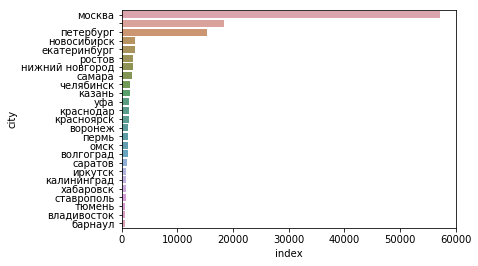

In [267]:
cities_extracted = cities_transformed.reset_index().groupby('city').count().sort_values('index', ascending=False)
sns.barplot(data=cities_extracted.reset_index().head(25), x='index', y='city', saturation=.5)

##### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –±–∞–Ω–∫–∞–º

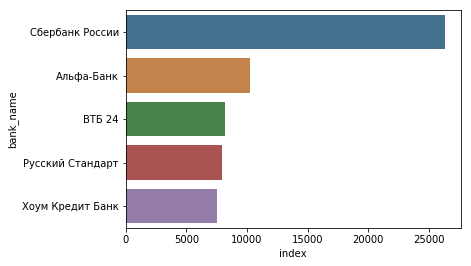

In [268]:
bank_names = data.loc[:,['bank_name']].copy()
banks = bank_names.reset_index().groupby('bank_name').count().sort_values('index', ascending=False).head(5)
sns.barplot(data=banks.reset_index(), x='index', y='bank_name', saturation=.5)

In [269]:
regex = r'–≥\. ([–ê-–Ø–∞-—è- ]+)'
def get_city(text, regex=regex):
    try:
        values = re.findall(regex, text)
        return ' '.join(values).lower()
    except:
        return ""

###### –ì–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö

In [270]:
regex = '[–ê-–Ø–∞-—è]+'
from nltk.corpus import stopwords
from pymystem3 import Mystem
from pymorphy2 import MorphAnalyzer


rus_stopwords = stopwords.words('russian')
lemmatizator = Mystem()
pm2 = MorphAnalyzer()

def words_only(text, regex=regex):
    try:
        value = ' '.join(re.findall(regex, text)).lower()
        return value
    except:
        return ''
    
def drop_stopwords(text, stopwords=rus_stopwords):
    try:
        value = ' '.join([token for token in text.split() if not token in stopwords])
        return value
    except:
        return ''
    
def lemmatize(text, converter=pm2):
    try:
        value = [converter.parse(word)[0].normal_form for word in text.split()]
        return ' '.join(value)
    except:
        return ''
    
def nounizator(text, converter=pm2):
    try:
        value = [converter.parse(word)[0].normal_form for word in text.split() 
                              if 'NOUN' in converter.parse(word)[0].tag]
        return ' '.join(value)
    except:
        return ''

In [271]:
texts = data.text.apply(words_only)

In [14]:
from collections import Counter
cnt = Counter()
len_cnt = Counter()
tokens = []
for i, text in tqdm_notebook(texts.iteritems()):
    # –°–ª–æ–≤–∞
    tokens = [i for i in text.split()]
    cnt.update(tokens)
    # –î–ª–∏–Ω—ã —Å–ª–æ–≤
    len_tokens = [len(i) for i in text.split()]
    len_cnt.update(len_tokens)

In [15]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞
sns.set(rc={'figure.figsize':(10,4)})

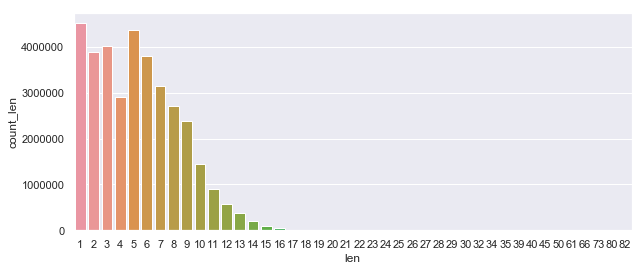

In [16]:
# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö
word_lens = pd.DataFrame.from_dict(dict(len_cnt), orient='index').reset_index()
word_lens.columns = ['len', 'count_len']
sns.barplot(data=word_lens, x='len', y='count_len', ci=10)

###### –ì–∏—Å—Ç–æ–≥—Ä–∞–º–∞ –¥–ª–∏–Ω –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –≤ —Å–ª–æ–≤–∞—Ö

In [17]:
from nltk.tokenize import sent_tokenize
text_sentences = data.text.apply(sent_tokenize)

In [18]:
len_sent = Counter()
sentenses = []
for i, text in tqdm_notebook(text_sentences.iteritems()):
    # –ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
    for sentense in text:
        words = words_only(sentense).split()
        len_sent.update([len(words)])

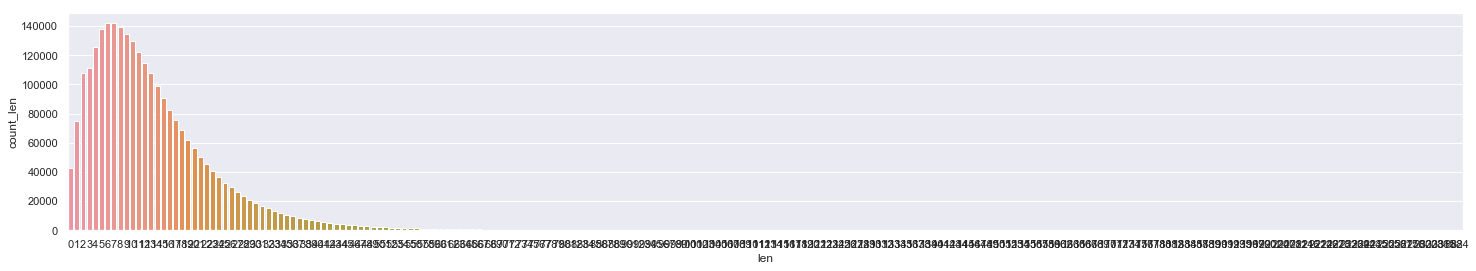

In [19]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞
sns.set(rc={'figure.figsize':(25,4)})

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª–∏–Ω –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –≤ —Å–ª–æ–≤–∞—Ö
sent_lens = pd.DataFrame.from_dict(dict(len_sent), orient='index').reset_index()
sent_lens.columns = ['len', 'count_len']
sns.barplot(data=sent_lens, x='len', y='count_len', ci=10)

###### –ß–∞—Å—Ç–æ—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑
10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
 - —Å–ª–æ–≤
 - —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
 - –ª–µ–º–º
 - —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö

In [39]:
words_cnt = Counter()
words_stop_off = Counter()
lemmas_cnt = Counter()
nouns_cnt = Counter()

n_types = []
n_tokens = []

for i, text in tqdm_notebook(texts.head(5000).iteritems()):
    # –°—á–∏—Ç–∞–µ–º —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞
    words_cnt.update(text.split())
    # –£–±–∏—Ä–∞–µ–º —Å—Ç–æ–ø-—Å–ª–æ–≤–∞
    clean_text_without_stop_words = drop_stopwords(text)
    words_stop_off.update(clean_text_without_stop_words.split())
    # –õ–µ–º–º–∞ –∏ —Å—Ü—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ
    nouns = nounizator(clean_text_without_stop_words)
    lemmas = lemmatize(clean_text_without_stop_words)
    lemmas_cnt.update(lemmas)
    nouns_cnt.update(nouns)
    # –ò–Ω—Ñ–∞ –¥–ª—è –∑–∞–∫–æ–Ω–∞ –•–∏–ø—Å–∞ - –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤
    n_types.append(len(lemmas_cnt))
    n_tokens.append(np.sum(lemmas_cnt[item] for item in lemmas_cnt))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


In [40]:
# 10 –°–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
words_cnt.most_common(10)

[('–≤', 37223),
 ('–∏', 30266),
 ('–Ω–µ', 24950),
 ('–Ω–∞', 20386),
 ('—á—Ç–æ', 17935),
 ('—è', 16774),
 ('—Å', 14048),
 ('–ø–æ', 11323),
 ('–º–Ω–µ', 9421),
 ('–±–∞–Ω–∫–∞', 8566)]

In [41]:
# 10 –°–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø —Å–ª–æ–≤
words_stop_off.most_common(10)

[('–±–∞–Ω–∫–∞', 8566),
 ('–±–∞–Ω–∫', 6868),
 ('—ç—Ç–æ', 5076),
 ('–¥–µ–Ω—å–≥–∏', 3472),
 ('–∫–∞—Ä—Ç—ã', 3095),
 ('–∫–∞—Ä—Ç—É', 2940),
 ('—Ç', 2700),
 ('–¥–µ–Ω—å', 2411),
 ('–∫—Ä–µ–¥–∏—Ç', 2376),
 ('–≥', 2239)]

In [42]:
# 10 –°–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –ª–µ–º–º
lemmas_cnt.most_common(10)

[('–±–∞–Ω–∫–∞', 12163),
 ('–∫–∞—Ä—Ç–∞', 9722),
 ('–±–∞–Ω–∫', 8507),
 ('—ç—Ç–æ', 5770),
 ('–≥–æ–¥', 5624),
 ('–º–æ–π', 5102),
 ('–∫—Ä–µ–¥–∏—Ç', 4956),
 ('–¥–µ–Ω—å', 4929),
 ('–¥–µ–Ω—å–≥–∞', 4676),
 ('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 4508)]

In [43]:
# 10 –°–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
nouns_cnt.most_common(10)

[('–±–∞–Ω–∫–∞', 12163),
 ('–∫–∞—Ä—Ç–∞', 9722),
 ('–±–∞–Ω–∫', 8507),
 ('–≥–æ–¥', 5624),
 ('–∫—Ä–µ–¥–∏—Ç', 4956),
 ('–¥–µ–Ω—å', 4929),
 ('–¥–µ–Ω—å–≥–∞', 4676),
 ('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 4508),
 ('–∫–ª–∏–µ–Ω—Ç', 4008),
 ('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 3437)]

##### –ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞

**–ó–∞–∫–æÃÅ–Ω –¶–∏ÃÅ–ø—Ñ–∞ (¬´—Ä–∞–Ω–≥‚Äî—á–∞—Å—Ç–æ—Ç–∞¬ª)** ‚Äî —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–∞—Å—Ç–æ—Ç—ã —Å–ª–æ–≤ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —è–∑—ã–∫–∞: –µ—Å–ª–∏ –≤—Å–µ —Å–ª–æ–≤–∞ —è–∑—ã–∫–∞ (–∏–ª–∏ –ø—Ä–æ—Å—Ç–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–ª–∏–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞) —É–ø–æ—Ä—è–¥–æ—á–∏—Ç—å –ø–æ —É–±—ã–≤–∞–Ω–∏—é —á–∞—Å—Ç–æ—Ç—ã –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è, —Ç–æ —á–∞—Å—Ç–æ—Ç–∞ n-–≥–æ —Å–ª–æ–≤–∞ –≤ —Ç–∞–∫–æ–º —Å–ø–∏—Å–∫–µ –æ–∫–∞–∂–µ—Ç—Å—è –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –æ–±—Ä–∞—Ç–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –µ–≥–æ –ø–æ—Ä—è–¥–∫–æ–≤–æ–º—É –Ω–æ–º–µ—Ä—É n (—Ç–∞–∫ –Ω–∞–∑—ã–≤–∞–µ–º–æ–º—É —Ä–∞–Ω–≥—É —ç—Ç–æ–≥–æ —Å–ª–æ–≤–∞, —Å–º. —à–∫–∞–ª–∞ –ø–æ—Ä—è–¥–∫–∞). 

–ù–∞–ø—Ä–∏–º–µ—Ä, –≤—Ç–æ—Ä–æ–µ –ø–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ—Å—Ç–∏ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ –≤ –¥–≤–∞ —Ä–∞–∑–∞ —Ä–µ–∂–µ, —á–µ–º –ø–µ—Ä–≤–æ–µ, —Ç—Ä–µ—Ç—å–µ ‚Äî –≤ —Ç—Ä–∏ —Ä–∞–∑–∞ —Ä–µ–∂–µ, —á–µ–º –ø–µ—Ä–≤–æ–µ, –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.

**–û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ**

–í –ª—é–±–æ–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–º —Ç–µ–∫—Å—Ç–µ —Ä–∞–Ω–≥ —Ç–∏–ø–∞ –æ–±—Ä–∞—Ç–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª–µ–Ω –µ–≥–æ —á–∞—Å—Ç–æ—Ç–µ: $f = \frac{a}{r}$

$f$ ‚Äì —á–∞—Å—Ç–æ—Ç–∞ —Ç–∏–ø–∞, $r$  ‚Äì —Ä–∞–Ω–≥ —Ç–∏–ø–∞, $a$  ‚Äì –ø–∞—Ä–∞–º–µ—Ç—Ä, –¥–ª—è —Å–ª–∞–≤—è–Ω—Å–∫–∏—Ö —è–∑—ã–∫–æ–≤ ‚Äì –æ–∫–æ–ª–æ 0.07

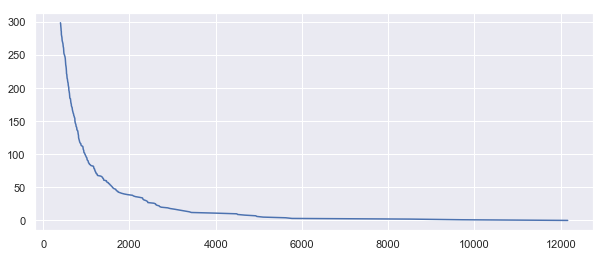

In [44]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞
sns.set(rc={'figure.figsize':(10,4)})

# –í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–∏–ø–∞ —Å–ª–æ–≤–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–µ–º–º—É
freqs = list(lemmas_cnt.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

##### –ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞
–° —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–∫–µ–Ω–æ–≤), –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∏–ø–æ–≤ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∑–∞–∫–æ–Ω–æ–º: $|V| = K*N^b$


$N$  ‚Äì  —á–∏—Å–ª–æ —Ç–æ–∫–µ–Ω–æ–≤, $|V|$  ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∏–ø–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–µ, $K, b$  ‚Äì  –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –æ–±—ã—á–Ω–æ $K \in [10,100], b \in [0.4, 0.6]$

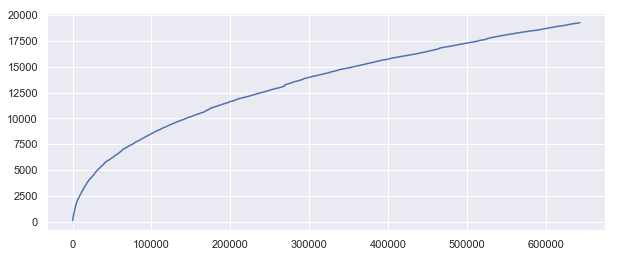

In [45]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_types)
plt.show()

#### –û—Ç–≤–µ—Ç—ã –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã
- –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?   

In [46]:
def sort_values(word1, word2, cnt=lemmas_cnt):
    try:
        if cnt[word1]>cnt[word2]:
            return [word1, word2]
        else:
            return [word2, word1]
    except:
        return ['-', '-']
    
print("–°–ª–æ–≤–æ '{0}' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ —Å–ª–æ–≤–∞ '{1}'".format(sort_values('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–∫–ª–∏–µ–Ω—Ç')[0], 
                                                        sort_values('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–∫–ª–∏–µ–Ω—Ç')[1]))

–°–ª–æ–≤–æ '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ —Å–ª–æ–≤–∞ '–∫–ª–∏–µ–Ω—Ç'


- —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?    

In [47]:
print("–°–ª–æ–≤–æ {0} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {1} —Ä–∞–∑".format('–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ', lemmas_cnt['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ']))
print("–°–ª–æ–≤–æ {0} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {1} —Ä–∞–∑".format('–¥–æ–≤–µ—Ä–∏–µ', lemmas_cnt['–¥–æ–≤–µ—Ä–∏–µ']))

–°–ª–æ–≤–æ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 116 —Ä–∞–∑
–°–ª–æ–≤–æ –¥–æ–≤–µ—Ä–∏–µ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 85 —Ä–∞–∑


### –ó–∞–¥–∞—á–∞ - –ø–æ–∏—Å–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

- –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É  $ùë°ùëì‚àíùëñùëëùëì$ , –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [35]:
# –ü–æ—Å–∫–æ–ª—å–∫—É —Ç—É—Ç –ø—Ä–∏–¥–µ—Ç—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ç–µ–∫—Å—Ç–∞–º–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –æ–±—ä–µ–º–æ–≤, 
# —Å–æ–±–µ—Ä–µ–º —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –∏–∑ –æ—Ç–∑—ã–≤–æ–≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤
NUM_ROWS = 150

dataset = data[(data.rating_grade==1)].sample(NUM_ROWS).copy()
dataset = dataset.append(data[(data.rating_grade==2)].sample(NUM_ROWS))
dataset = dataset.append(data[(data.rating_grade==3)].sample(NUM_ROWS))
dataset = dataset.append(data[(data.rating_grade==4)].sample(NUM_ROWS))
dataset = dataset.append(data[(data.rating_grade==5)].sample(NUM_ROWS))

dataset['text'] = dataset.apply(lambda row: words_only(row['text']), axis=1)
dataset['text'] = dataset.apply(lambda row: drop_stopwords(row['text']), axis=1)
dataset['lemmas'] = dataset.apply(lambda row: lemmatize(row['text']), axis=1)
dataset['nouns'] = dataset.apply(lambda row: nounizator(row['lemmas']), axis=1)

In [36]:
tokens_by_rating = []

for rating_grade in dataset.rating_grade.unique():
    if dataset['rating_grade'].value_counts()[rating_grade] > 100: 
        print(rating_grade)
        tokens = []
        sample = dataset[dataset['rating_grade']==rating_grade]
        
        for i in range(len(sample)):
            tokens += sample.text.iloc[i].split()
        tokens_by_rating.append(tokens)

1.0
2.0
3.0
4.0
5.0


###### –û–ø—Ä–µ–¥–µ–ª–∏–º –ø–æ 20 –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix = tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_rating])
feature_names = tfidf.get_feature_names() 
tfidf_positive_ranking = []
tfidf_negative_ranking = []
dense = tfidf_matrix.todense()

text = dense[4].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:50]:
    tfidf_positive_ranking.append(phrase)

text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:50]:
    tfidf_negative_ranking.append(phrase)

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –ø–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å–∫–ª—é—á–∏—Ç—å —Å—Ç–æ–ø —Å–ª–æ–≤–∞ –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤.

–ù–æ –±–µ–∑ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–∞–∫–∏—Ö —Å—Ç–æ–ø —Å–ª–æ–≤, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –∏–∑ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç.

In [51]:
# –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
[i for i in tfidf_negative_ranking if not i in tfidf_positive_ranking]

['–∑–∞—è–≤–ª–µ–Ω–∏–µ',
 '–ø–æ—á–µ–º—É',
 '–æ—Ç–≤–µ—Ç',
 '—Å—É–º–º—É',
 '—Ä—É–±–ª–µ–π',
 '–≤–æ–ø—Ä–æ—Å',
 '—Å–∫–∞–∑–∞–ª–∏',
 '—Å–º—Å',
 '–º–æ–≥—É',
 '–Ω–æ–º–µ—Ä',
 '—Ä—É–±',
 '—Ç–µ–ª–µ—Ñ–æ–Ω—É',
 '–Ω–∏–∫—Ç–æ',
 '–∫–æ—Ç–æ—Ä—ã–π',
 '–º–æ–µ–π',
 '–¥–æ–≥–æ–≤–æ—Ä–∞',
 '—Å—á–µ—Ç–∞',
 '–∑–∞—è–≤–∫—É',
 '–º–µ—Å—è—Ü',
 '—Ö–æ—Ç—è']

In [53]:
# –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
[i for i in tfidf_positive_ranking if not i in tfidf_negative_ranking]

['—Å–ø–∞—Å–∏–±–æ',
 '–±—ã—Å—Ç—Ä–æ',
 '–∏–Ω—Ç–µ—Ä–Ω–µ—Ç',
 '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ',
 '—Ö–æ—á—É',
 '–≤—Å',
 '–≤–∫–ª–∞–¥',
 '–±–∞–Ω–∫—É',
 '—Å—Ä–∞–∑—É',
 '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤',
 '–≤–æ–ø—Ä–æ—Å—ã',
 '–ø—Ä–∏—è—Ç–Ω–æ',
 '–∫–ª–∏–µ–Ω—Ç–æ–º',
 '–±–∞–Ω–∫–æ–≤',
 '–¥–Ω—è',
 '–∫–ª–∏–µ–Ω—Ç–æ–≤',
 '–≤—Å–µ–º',
 '–æ—á–µ—Ä–µ–¥–∏',
 '–ø–æ–∫–∞',
 '—É–¥–æ–±–Ω–æ']

###### –û–ø—Ä–µ–¥–µ–ª–∏–º 20 –±–∏–≥—Ä–∞–º –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

In [67]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df = 0)
tfidf_matrix = tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_rating])
feature_names = tfidf.get_feature_names() 
tfidf_positive_ranking = []
tfidf_negative_ranking = []
dense = tfidf_matrix.todense()

text = dense[4].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:50]:
    tfidf_positive_ranking.append(phrase)

text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:50]:
    tfidf_negative_ranking.append(phrase)

In [69]:
tfidf_negative_ranking[0:20]

['–æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞',
 '—Å–∏—Ö –ø–æ—Ä',
 '—Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å',
 '–Ω–∞–ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ',
 '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å–±–µ—Ä–±–∞–Ω–∫–∞',
 '—Ç—ã—Å —Ä—É–±',
 '–¥–æ–±—Ä—ã–π –¥–µ–Ω—å',
 '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞',
 '–∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Å—á–µ—Ç',
 '–≤–æ–ø—Ä–æ—Å –ø–æ—á–µ–º—É',
 '—Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏',
 '–±–∏–ª–ª–∏–Ω–≥ –∞–¥—Ä–µ—Å',
 '–Ω–µ–¥–µ–ª–∏ –Ω–∞–∑–∞–¥',
 '—Ç—ã—Å —Ä—É–±–ª',
 '–¥–µ–Ω–µ–∂–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤',
 '–∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫',
 '–∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã',
 '–∫—Ä–µ–¥–∏—Ç–Ω—É—é –ª–∏–Ω–∏—é',
 '–¥–æ—Å—Ä–æ—á–Ω–æ–µ –ø–æ–≥–∞—à–µ–Ω–∏–µ',
 '—Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º']

In [70]:
tfidf_positive_ranking[0:20]

['—Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å',
 '–∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫',
 '–¥–æ–±—Ä—ã–π –¥–µ–Ω—å',
 '—Ö–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å',
 '–æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ',
 '—è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º',
 '–¥—Ä—É–≥–∏—Ö –±–∞–Ω–∫–∞—Ö',
 '–∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞',
 '—Ö–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å',
 '–∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫–∏–Ω–≥',
 '–æ—Ç–¥–µ–ª—å–Ω–æ–µ —Å–ø–∞—Å–∏–±–æ',
 '–æ—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ',
 '–¥–µ–Ω—å –¥–µ–Ω—å',
 '–¥–∞–Ω–Ω–æ–≥–æ –±–∞–Ω–∫–∞',
 '–∞–ª—å—Ñ–∞ –±–∞–Ω–∫',
 '–¥—Ä—É–≥–æ–º –±–∞–Ω–∫–µ',
 '–æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ',
 '–Ω–∏–∫–∞–∫–∏—Ö –ø—Ä–æ–±–ª–µ–º',
 '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞',
 '–∏—Å—á–µ—Ä–ø—ã–≤–∞—é—â–∏–µ –æ—Ç–≤–µ—Ç—ã']

## –ß–∞—Å—Ç—å 2. –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ [20/100]

1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º. –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º.
2. –ù–∞–π–¥–∏—Ç–µ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫). –ú–æ–∂–µ—Ç–µ –ª–∏ –≤—ã –∏—Ö –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å?

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim. 

In [102]:
stoplemmas = ['–±–∞–Ω–∫–∞', '—ç—Ç–æ', '–±–∞–Ω–∫',  '–∫–∞—Ä—Ç—ã',   '–∫–∞—Ä—Ç—É',  
              '–æ—Ç–¥–µ–ª–µ–Ω–∏–µ',   '–¥–µ–Ω—å',  '–±–∞–Ω–∫–µ',  '–≥–æ–¥–∞',  
              '–ø—Ä–æ—Å—Ç–æ',  '–æ—á–µ–Ω—å',  '–æ—Ç–¥–µ–ª–µ–Ω–∏–∏',  '–¥–Ω–µ–π',  
              '–Ω–µ—Å–∫–æ–ª—å–∫–æ',  '–º–∏–Ω—É—Ç',  '–æ—Ç–¥–µ–ª–µ–Ω–∏—è',  
              '–¥–µ–≤—É—à–∫–∞',  '–¥–µ–Ω–µ–≥',  '–±–∞–Ω–∫–æ–º',  '–æ—Ñ–∏—Å']

def drop_stoplemmas(text, stoplemmas = stoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in stoplemmas])
    except:
        return ""

In [103]:
from gensim import corpora, models
import gensim

In [109]:
from gensim import corpora, models

dictionary = corpora.Dictionary(dataset.nouns.apply(drop_stoplemmas).str.split())
corpus = [dictionary.doc2bow(text) for text in dataset.nouns.apply(drop_stoplemmas).str.split()]

In [110]:
%time ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=20)

CPU times: user 16.7 s, sys: 142 ms, total: 16.8 s
Wall time: 17 s


In [111]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0,
  '0.028*"–∫—Ä–µ–¥–∏—Ç" + 0.018*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.014*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.013*"–≥–æ–¥" + 0.012*"–∫–ª–∏–µ–Ω—Ç"'),
 (1,
  '0.026*"–∫–ª–∏–µ–Ω—Ç" + 0.021*"–æ—á–µ—Ä–µ–¥—å" + 0.018*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.017*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.017*"–¥–µ–Ω—å–≥–∞"'),
 (2,
  '0.017*"–≤–∫–ª–∞–¥" + 0.017*"–∫–ª–∏–µ–Ω—Ç" + 0.012*"–æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–∏—Å—Ç–∫–∞" + 0.012*"–≤–æ–ø—Ä–æ—Å" + 0.006*"—Ä–µ—à–µ–Ω–∏–µ"'),
 (3,
  '0.087*"–∫–∞—Ä—Ç–∞" + 0.021*"–¥–µ–Ω—å–≥–∞" + 0.016*"—Å—á—ë—Ç" + 0.013*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.013*"–∫–ª–∏–µ–Ω—Ç"'),
 (4,
  '0.030*"—Ä—É–±–ª—å" + 0.029*"–∫—Ä–µ–¥–∏—Ç" + 0.028*"—Å—É–º–º–∞" + 0.025*"–≥–æ–¥" + 0.024*"—Å—á—ë—Ç"')]

In [112]:
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

##### –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ç–µ–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤–æ–∑–Ω–∏–∫–∞—é—Ç –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –°–±–µ—Ä–±–∞–Ω–∫–∞

In [120]:
dataset.bank_name.value_counts().head()

–°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏     92
–ê–ª—å—Ñ–∞-–ë–∞–Ω–∫          50
–í–¢–ë 24              38
–†—É—Å—Å–∫–∏–π –°—Ç–∞–Ω–¥–∞—Ä—Ç    33
–•–æ—É–º –ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫    31
Name: bank_name, dtype: int64

In [122]:
from gensim import corpora, models

dictionary = corpora.Dictionary(dataset[(dataset.bank_name=='–°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏')].nouns.apply(drop_stoplemmas).str.split())
corpus = [dictionary.doc2bow(text) for text in dataset.nouns.apply(drop_stoplemmas).str.split()]

In [123]:
%time ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=20)

CPU times: user 15.6 s, sys: 45.5 ms, total: 15.7 s
Wall time: 15.7 s


In [124]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0,
  '0.064*"–∫—Ä–µ–¥–∏—Ç" + 0.029*"–∑–∞—è–≤–∫–∞" + 0.024*"–¥–æ–≥–æ–≤–æ—Ä" + 0.020*"–≥–æ–¥" + 0.020*"–¥–æ–∫—É–º–µ–Ω—Ç"'),
 (1,
  '0.063*"–¥–µ–Ω—å–≥–∞" + 0.040*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.037*"—Å—á—ë—Ç" + 0.037*"—Ä—É–±–ª—å" + 0.032*"—Å—É–º–º–∞"'),
 (2,
  '0.030*"–∫–ª–∏–µ–Ω—Ç" + 0.029*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.019*"–≥–æ–¥" + 0.017*"—Å—á—ë—Ç" + 0.017*"–¥–æ–∫—É–º–µ–Ω—Ç"'),
 (3,
  '0.129*"–∫–∞—Ä—Ç–∞" + 0.018*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.017*"–≥–æ–¥" + 0.017*"–∏–Ω—Ç–µ—Ä–Ω–µ—Ç" + 0.016*"—Å—á—ë—Ç"'),
 (4,
  '0.073*"–≤–∫–ª–∞–¥" + 0.036*"–æ—á–µ—Ä–µ–¥—å" + 0.031*"–∫–ª–∏–µ–Ω—Ç" + 0.022*"–∫–∞—Å—Å–∞" + 0.020*"–º–∏–Ω—É—Ç–∞"')]

In [125]:
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## –ß–∞—Å—Ç—å 3. –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –±—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞, —Ç–æ –µ—Å—Ç—å, —Ä–∞–∑–ª–∏—á–∞—Ç—å —Ä–µ–∑–∫–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 1) –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 5). 

1.  –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ: –≤—ã–±–µ—Ä–∏—Ç–µ –∏–∑ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö N1 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ N2 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5 (–∑–Ω–∞—á–µ–Ω–∏–µ N1 –∏ N2 ‚Äì –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ ```sklearn.model_selection.train_test_split``` –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ. 
2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö $n$-–≥—Ä–∞–º. 
3. –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
* 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: $tf-idf$ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (```sklearn.feature_extraction.text.TfidfTransformer```) –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ (–æ–Ω–æ –∂–µ ‚Äì –ª–∞—Ç–µ–Ω—Ç—ã–π —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑) (```sklearn.decomposition.TruncatedSVD```), 
* 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ LDA (```sklearn.decomposition.LatentDirichletAllocation```). 

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ accuracy –∏ F-measure –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. 

–ù–∏–∂–µ –Ω–∞–ø–∏—Å–∞–Ω –ø—Ä–∏–º–µ—Ä–Ω—ã–π Pipeline –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤. 

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sklearn. 

In [144]:
# –ü–æ—Å–∫–æ–ª—å–∫—É —Ç—É—Ç –ø—Ä–∏–¥–µ—Ç—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ç–µ–∫—Å—Ç–∞–º–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –æ–±—ä–µ–º–æ–≤, 
# —Å–æ–±–µ—Ä–µ–º —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –∏–∑ –æ—Ç–∑—ã–≤–æ–≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤
NUM_ROWS = 350

dataset_clf = data[(data.rating_grade==1)].sample(NUM_ROWS).copy()
dataset_clf = dataset_clf.append(data[(data.rating_grade==5)].sample(NUM_ROWS).copy())

dataset_clf['text'] = dataset_clf.apply(lambda row: words_only(row['text']), axis=1)
dataset_clf['text'] = dataset_clf.apply(lambda row: drop_stopwords(row['text']), axis=1)
dataset_clf['lemmas'] = dataset_clf.apply(lambda row: lemmatize(row['text']), axis=1)

In [247]:
# –°–æ–±–µ—Ä–µ–º –¥–∞—Ç–∞—Å–µ—Ç —Å –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–æ–π
from sklearn.model_selection import train_test_split

X = dataset_clf.text
y = dataset_clf.rating_grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [259]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: tf-idf + LSI
clf = Pipeline([ 
    ('tfidf', None), 
    ('decomp', None), 
    ('clf', LogisticRegression(solver='lbfgs'))
])

NGRAM_WORD_OPTIONS = [(1,1),(2,2),(3,3)]
NGRAM_CHAR_OPTIONS = [(3,4)]
DECOMP_OPTIONS = [50, 60, 90]
param_grid = [
    # 1-–π –≤–∞—Ä–∏–∞–Ω—Ç: —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –∏ TfIdf
    {
        'tfidf': [TfidfVectorizer(analyzer='word')],
        'tfidf__ngram_range': NGRAM_WORD_OPTIONS,
        'decomp': [TruncatedSVD(), LatentDirichletAllocation()],
        'decomp__n_components': DECOMP_OPTIONS,
    },
    {
        'tfidf': [TfidfVectorizer(analyzer='char')],
        'tfidf__ngram_range': NGRAM_CHAR_OPTIONS,
        'decomp': [TruncatedSVD(), LatentDirichletAllocation()],
        'decomp__n_components': DECOMP_OPTIONS,
    },
]

SCORES = ['f1', 'accuracy']

grid_tfidf_svd = GridSearchCV(clf, cv=5, n_jobs=1, param_grid=param_grid, scoring=SCORES, refit='accuracy', return_train_score=True)

grid_tfidf_svd.fit(X_train, y_train)
grid_tfidf_svd.best_estimator_.steps

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sco

[('tfidf',
  TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
          dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(3, 4), norm='l2', preprocessor=None, smooth_idf=True,
          stop_words=None, strip_accents=None, sublinear_tf=False,
          token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
          vocabulary=None)),
 ('decomp', TruncatedSVD(algorithm='randomized', n_components=90, n_iter=5,
         random_state=None, tol=0.0)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
            tol=0.0001, verbose=0, warm_start=False))]

In [260]:
predictions = grid_tfidf_svd.best_estimator_.predict(X_test)
print("–†–µ–∑—É–ª—å—Ç–∞—Ç –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏:\n F1 Score = {0} \n Accuracy = {1}"\
          .format(f1_score(predictions, y_test), accuracy_score(predictions, y_test)))

–†–µ–∑—É–ª—å—Ç–∞—Ç –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏:
 F1 Score = 0.923076923076923 
 Accuracy = 0.9142857142857143


In [261]:
# –ê–Ω–∞–ª–∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö n-–≥—Ä–∞–º–º –Ω–∞ –æ—Å–Ω–æ–≤–µ tfidf –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è
svd_models = pd.DataFrame.from_dict(grid_tfidf_svd.cv_results_)
svd_models = svd_models[['param_tfidf', 'param_tfidf__ngram_range', 'param_decomp', 'param_decomp__n_components', 
        'mean_test_f1', 'mean_test_accuracy']]
svd_models['param_tfidf'] = svd_models.param_tfidf.apply(lambda row: row.analyzer)
svd_models['param_decomp'] = svd_models.param_decomp.apply(lambda row: row.__class__.__name__)
svd_models.sort_values('mean_test_accuracy', ascending=False)

param_tfidf param_tfidf__ngram_range               param_decomp  \
20        char                   (3, 4)               TruncatedSVD   
19        char                   (3, 4)               TruncatedSVD   
6         word                   (1, 1)               TruncatedSVD   
0         word                   (1, 1)               TruncatedSVD   
18        char                   (3, 4)               TruncatedSVD   
3         word                   (1, 1)               TruncatedSVD   
7         word                   (2, 2)               TruncatedSVD   
12        word                   (1, 1)  LatentDirichletAllocation   
15        word                   (1, 1)  LatentDirichletAllocation   
4         word                   (2, 2)               TruncatedSVD   
16        word                   (2, 2)  LatentDirichletAllocation   
22        char                   (3, 4)  LatentDirichletAllocation   
1         word                   (2, 2)               TruncatedSVD   
13        word                   (2, 2)  LatentDirichletAllocation   
9         word                   (1, 1)  LatentDirichletAllocation   
23        char                   (3, 4)  LatentDirichletAllocation   
10        word                   (2, 2)  LatentDirichletAllocation   
17        word                   (3, 3)  LatentDirichletAllocation   
11        word                   (3, 3)  LatentDirichletAllocation   
21        char                   (3, 4)  LatentDirichletAllocation   
14        word                   (3, 3)  LatentDirichletAllocation   
5         word                   (3, 3)               TruncatedSVD   
2         word                   (3, 3)               TruncatedSVD   
8         word                   (3, 3)               TruncatedSVD   

   param_decomp__n_components  mean_test_f1  mean_test_accuracy  
20                         90      0.851664            0.860714  
19                         60      0.847893            0.857143  
6                          90      0.847971            0.857143  
0                          50      0.846502            0.855357  
18                         50      0.842039            0.851786  
3                          60      0.836960            0.848214  
7                          90      0.464405            0.653571  
12                         60      0.597787            0.653571  
15                         90      0.578229            0.651786  
4                          60      0.333616            0.608929  
16                         90      0.483689            0.607143  
22                         60      0.424099            0.607143  
1                          50      0.317541            0.596429  
13                         60      0.444073            0.585714  
9                          50      0.378571            0.576786  
23                         90      0.259467            0.575000  
10                         50      0.427935            0.573214  
17                         90      0.415498            0.566071  
11                         50      0.385013            0.555357  
21                         50      0.231973            0.555357  
14                         60      0.385561            0.528571  
5                          60      0.014414            0.519643  
2                          50      0.007273            0.517857  
8                          90      0.007018            0.512500